In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head(10)

,id,Timestamp,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country,Clicked
0,1200,2016-01-01 02:52:10,80.67,34,58909.36,239.76,Seamless impactful info-mediaries,0,Portugal,0
1,1201,2016-01-01 03:35:35,68.01,25,68357.96,188.32,Ameliorated actuating workforce,1,Afghanistan,0
2,1202,2016-01-01 05:31:22,80.94,36,60803.00,239.94,Self-enabling local strategy,0,Bermuda,0
3,1203,2016-01-01 08:27:06,78.77,28,63497.62,211.83,Public-key intangible Graphical User Interface,0,Guam,0
4,1204,2016-01-01 15:14:24,36.56,29,42838.29,195.89,Team-oriented bi-directional secured line,0,Uganda,1
5,1205,2016-01-01 20:17:49,55.79,36,NaN,175.17,Monitored systematic hierarchy,0,Mongolia,1
6,1206,2016-01-01 20:17:49,46.61,42,65856.74,136.18,Progressive intermediate throughput,0,Ethiopia,1
7,1207,2016-01-01 21:58:55,75.32,28,59998.50,233.60,Reduced mobile structure,1,Mauritius,0
8,1208,2016-01-02 04:50:44,79.36,33,62330.75,234.72,Cross-platform directional intranet,1,Gambia,0
9,1209,2016-01-02 09:30:11,73.10,59,NaN,254.34,Enterprise-wide incremental Internet solution,1,Guyana,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1000 non-null   int64  
 1   Timestamp                 1000 non-null   object 
 2   Daily Time Spent on Site  1000 non-null   float64
 3   Age                       1000 non-null   int64  
 4   Area Income               775 non-null    float64
 5   Daily Internet Usage      1000 non-null   float64
 6   Ad Topic Line             1000 non-null   object 
 7   gender                    1000 non-null   int64  
 8   Country                   1000 non-null   object 
 9   Clicked                   1000 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 78.2+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        300 non-null    int64  
 1   Timestamp                 300 non-null    object 
 2   Daily Time Spent on Site  300 non-null    float64
 3   Age                       300 non-null    int64  
 4   Area Income               225 non-null    float64
 5   Daily Internet Usage      300 non-null    float64
 6   Ad Topic Line             300 non-null    object 
 7   gender                    300 non-null    int64  
 8   Country                   300 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 21.2+ KB


In [6]:
train['gender']=train['gender'].astype('str')
train['Clicked']=train['Clicked'].astype('Bool')
train['Timestamp']=pd.to_datetime(train['Timestamp'])
#same for the test data:
test['gender']=test['gender'].astype('str')
test['Timestamp']=pd.to_datetime(test['Timestamp'])

In [7]:
# 0:Monday ... 6:Sunday
train['weekday']=train['Timestamp'].dt.dayofweek.astype('str')
test['weekday']=test['Timestamp'].dt.dayofweek.astype('str')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        1000 non-null   int64         
 1   Timestamp                 1000 non-null   datetime64[ns]
 2   Daily Time Spent on Site  1000 non-null   float64       
 3   Age                       1000 non-null   int64         
 4   Area Income               775 non-null    float64       
 5   Daily Internet Usage      1000 non-null   float64       
 6   Ad Topic Line             1000 non-null   object        
 7   gender                    1000 non-null   object        
 8   Country                   1000 non-null   object        
 9   Clicked                   1000 non-null   bool          
 10  weekday                   1000 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 79.2+ 

In [9]:
train['Time_of_Day']= train['Timestamp'].dt.hour

In [10]:
test['Time_of_Day']= test['Timestamp'].dt.hour

In [11]:
train['Time_of_Day'].unique()

array([ 2,  3,  5,  8, 15, 20, 21,  4,  9, 12, 14,  7, 16, 17, 23,  0,  6,
       22, 11, 13, 19, 18, 10,  1])

In [12]:
train['weekday'].unique()

array(['4', '5', '6', '0', '1', '2', '3'], dtype=object)

In [13]:
#train['weekday'].isna().sum()

In [14]:
#train['weekday']=train['Timestamp'].dt.day_name()
#test['weekday']=test['Timestamp'].dt.day_name()

In [15]:
#train['weekday'].isna().sum()

In [16]:
#test['weekday'].isna().sum()

In [17]:
#train['weekday'].unique()

In [18]:
# 0:Monday ... 6:Sunday
#weekNametoNumber = {'Friday':4, 'Saturday':5, 'Sunday':6, 'Monday':0, 'Tuesday':1, 'Wednesday':2,
#       'Thursday':3}

In [19]:
#train_w=[]
#for key in train['weekday']:
#    train_w.append(weekNametoNumber[key])
    
#train['weekday']=pd.DataFrame(train_w)

In [20]:
#test_w=[]
#for key in test['weekday']:
#    test_w.append(weekNametoNumber[key])

#test['weekday']=pd.DataFrame(test_w)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        1000 non-null   int64         
 1   Timestamp                 1000 non-null   datetime64[ns]
 2   Daily Time Spent on Site  1000 non-null   float64       
 3   Age                       1000 non-null   int64         
 4   Area Income               775 non-null    float64       
 5   Daily Internet Usage      1000 non-null   float64       
 6   Ad Topic Line             1000 non-null   object        
 7   gender                    1000 non-null   object        
 8   Country                   1000 non-null   object        
 9   Clicked                   1000 non-null   bool          
 10  weekday                   1000 non-null   object        
 11  Time_of_Day               1000 non-null   int64         
dtypes: bool(1), datetime6

In [22]:
pd.DataFrame(train['Country'].unique()).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       233 non-null    object
dtypes: object(1)
memory usage: 1.9+ KB


In [23]:
#May cause sparse matrix problem, drop 'Country'
train.drop('Country',axis=1,inplace=True)
test.drop('Country',axis=1,inplace=True)

In [24]:
pd.DataFrame(train['Ad Topic Line'])

,Ad Topic Line
0,Seamless impactful info-mediaries
1,Ameliorated actuating workforce
2,Self-enabling local strategy
3,Public-key intangible Graphical User Interface
4,Team-oriented bi-directional secured line
...,...
995,Triple-buffered human-resource complexity
996,Virtual 5thgeneration emulation
997,Front-line incremental access
998,Mandatory coherent groupware


In [25]:
pd.DataFrame(train['Ad Topic Line'].unique()).info()
#Not enough data for effective NLP training

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       825 non-null    object
dtypes: object(1)
memory usage: 6.6+ KB


In [26]:
train.drop('Ad Topic Line',axis=1,inplace=True)
test.drop('Ad Topic Line',axis=1,inplace=True)

In [27]:
train.isna().sum()

id                            0
Timestamp                     0
Daily Time Spent on Site      0
Age                           0
Area Income                 225
Daily Internet Usage          0
gender                        0
Clicked                       0
weekday                       0
Time_of_Day                   0
dtype: int64

In [28]:
test.isna().sum()

id                           0
Timestamp                    0
Daily Time Spent on Site     0
Age                          0
Area Income                 75
Daily Internet Usage         0
gender                       0
weekday                      0
Time_of_Day                  0
dtype: int64

In [29]:
train.loc[train.iloc[:,4].isna()==True]

,id,Timestamp,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,gender,Clicked,weekday,Time_of_Day
5,1205,2016-01-01 20:17:49,55.79,36,NaN,175.17,0,True,4,20
9,1209,2016-01-02 09:30:11,73.10,59,NaN,254.34,1,True,5,9
13,1213,2016-01-03 03:22:15,86.06,42,NaN,108.18,0,False,6,3
22,1222,2016-01-03 23:21:26,56.56,21,NaN,219.69,0,False,6,23
25,1225,2016-01-04 04:00:35,32.91,39,NaN,195.91,0,True,0,4
...,...,...,...,...,...,...,...,...,...,...
983,2183,2016-06-02 04:14:37,59.64,36,NaN,219.79,0,False,3,4
989,2189,2016-06-03 03:36:18,78.24,29,NaN,235.35,1,True,4,3
993,2193,2016-06-03 07:00:36,60.53,22,NaN,123.86,0,True,4,7
995,2195,2016-06-03 17:32:47,82.12,54,NaN,132.66,1,True,4,17


<AxesSubplot:xlabel='Area Income', ylabel='Count'>

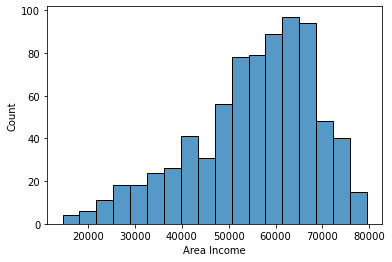

In [30]:
sns.histplot(train['Area Income'])

In [31]:
#we may intepolate NA with timeseries data:'Timestamp'
train.set_index('Timestamp',inplace=True)
test.set_index('Timestamp',inplace=True)

In [32]:
train['Area Income'].interpolate(method='linear',inplace=True)

In [33]:
train.isna().sum()

id                          0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
gender                      0
Clicked                     0
weekday                     0
Time_of_Day                 0
dtype: int64

<AxesSubplot:xlabel='Area Income', ylabel='Count'>

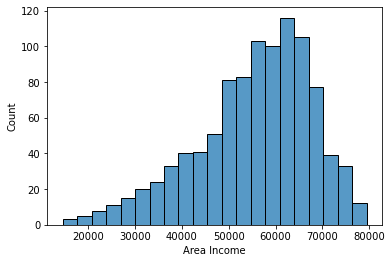

In [34]:
sns.histplot(train['Area Income'])
#We can see that the overall distribution after fill NA with interploation remains similar.

In [35]:
test['Area Income'].interpolate(method='linear',inplace=True)

In [36]:
train.reset_index(inplace=True)

In [37]:
test.reset_index(inplace=True)

In [38]:
train.columns

Index(['Timestamp', 'id', 'Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'gender', 'Clicked', 'weekday', 'Time_of_Day'],
      dtype='object')

In [39]:
temp_features = ['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Clicked'
       ,'Time_of_Day']
category_feature = ['gender','weekday']

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


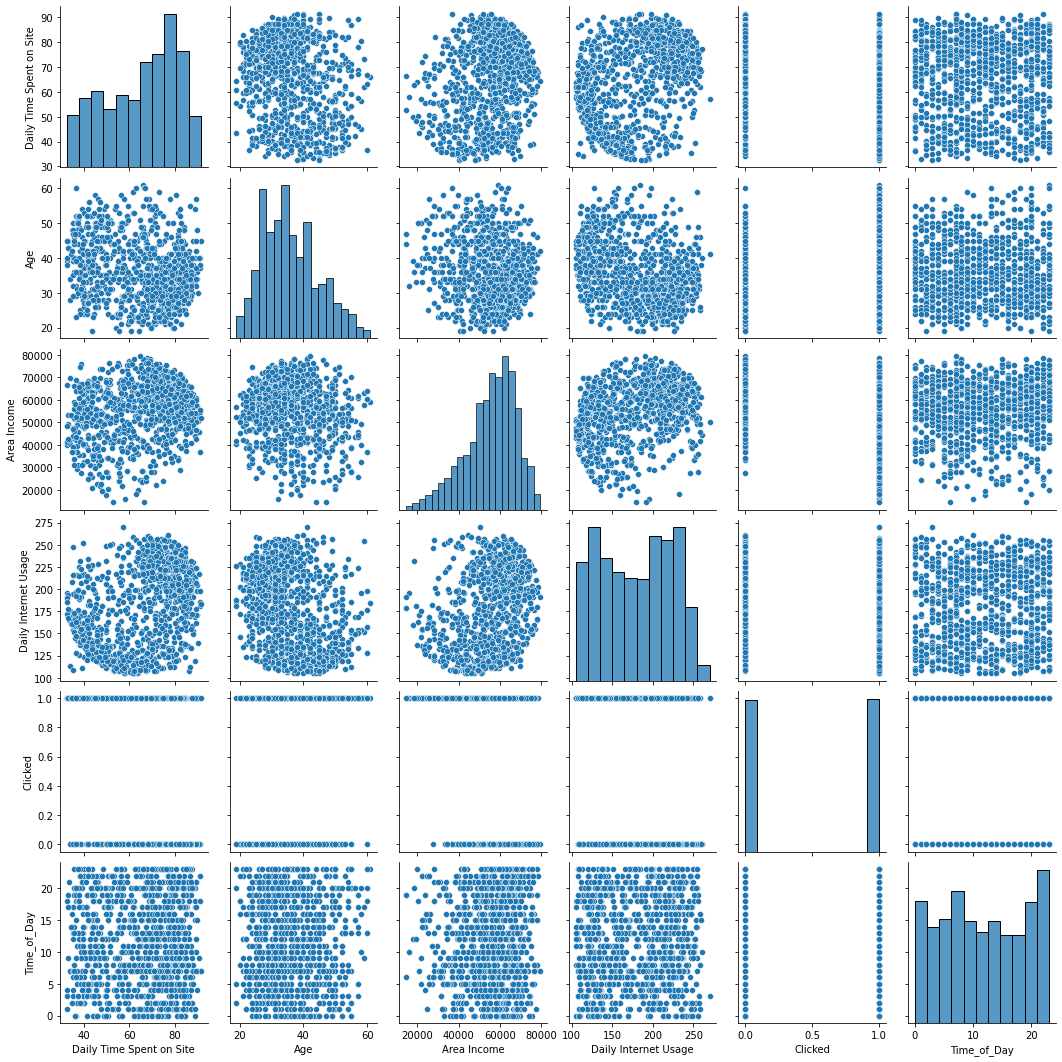

In [40]:
#It makes sense to consider 'Age', 'Daily Time Spent on Site', 'Daily Internet Usage' are correlated. Let's check through graph 
sns.pairplot(train[temp_features])

In [41]:
train[temp_features].corr()
#as expected, most of the features in above charts are correlated except weekday and Time_of_Day.

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked,Time_of_Day
Daily Time Spent on Site,1.000000,-0.247097,0.255235,0.374857,-0.581175,-0.000697
Age,-0.247097,1.000000,-0.162247,-0.310589,0.370820,-0.025217
Area Income,0.255235,-0.162247,1.000000,0.290585,-0.394150,0.032526
Daily Internet Usage,0.374857,-0.310589,0.290585,1.000000,-0.589340,0.092216
Clicked,-0.581175,0.370820,-0.394150,-0.589340,1.000000,-0.051893
Time_of_Day,-0.000697,-0.025217,0.032526,0.092216,-0.051893,1.000000


<AxesSubplot:>

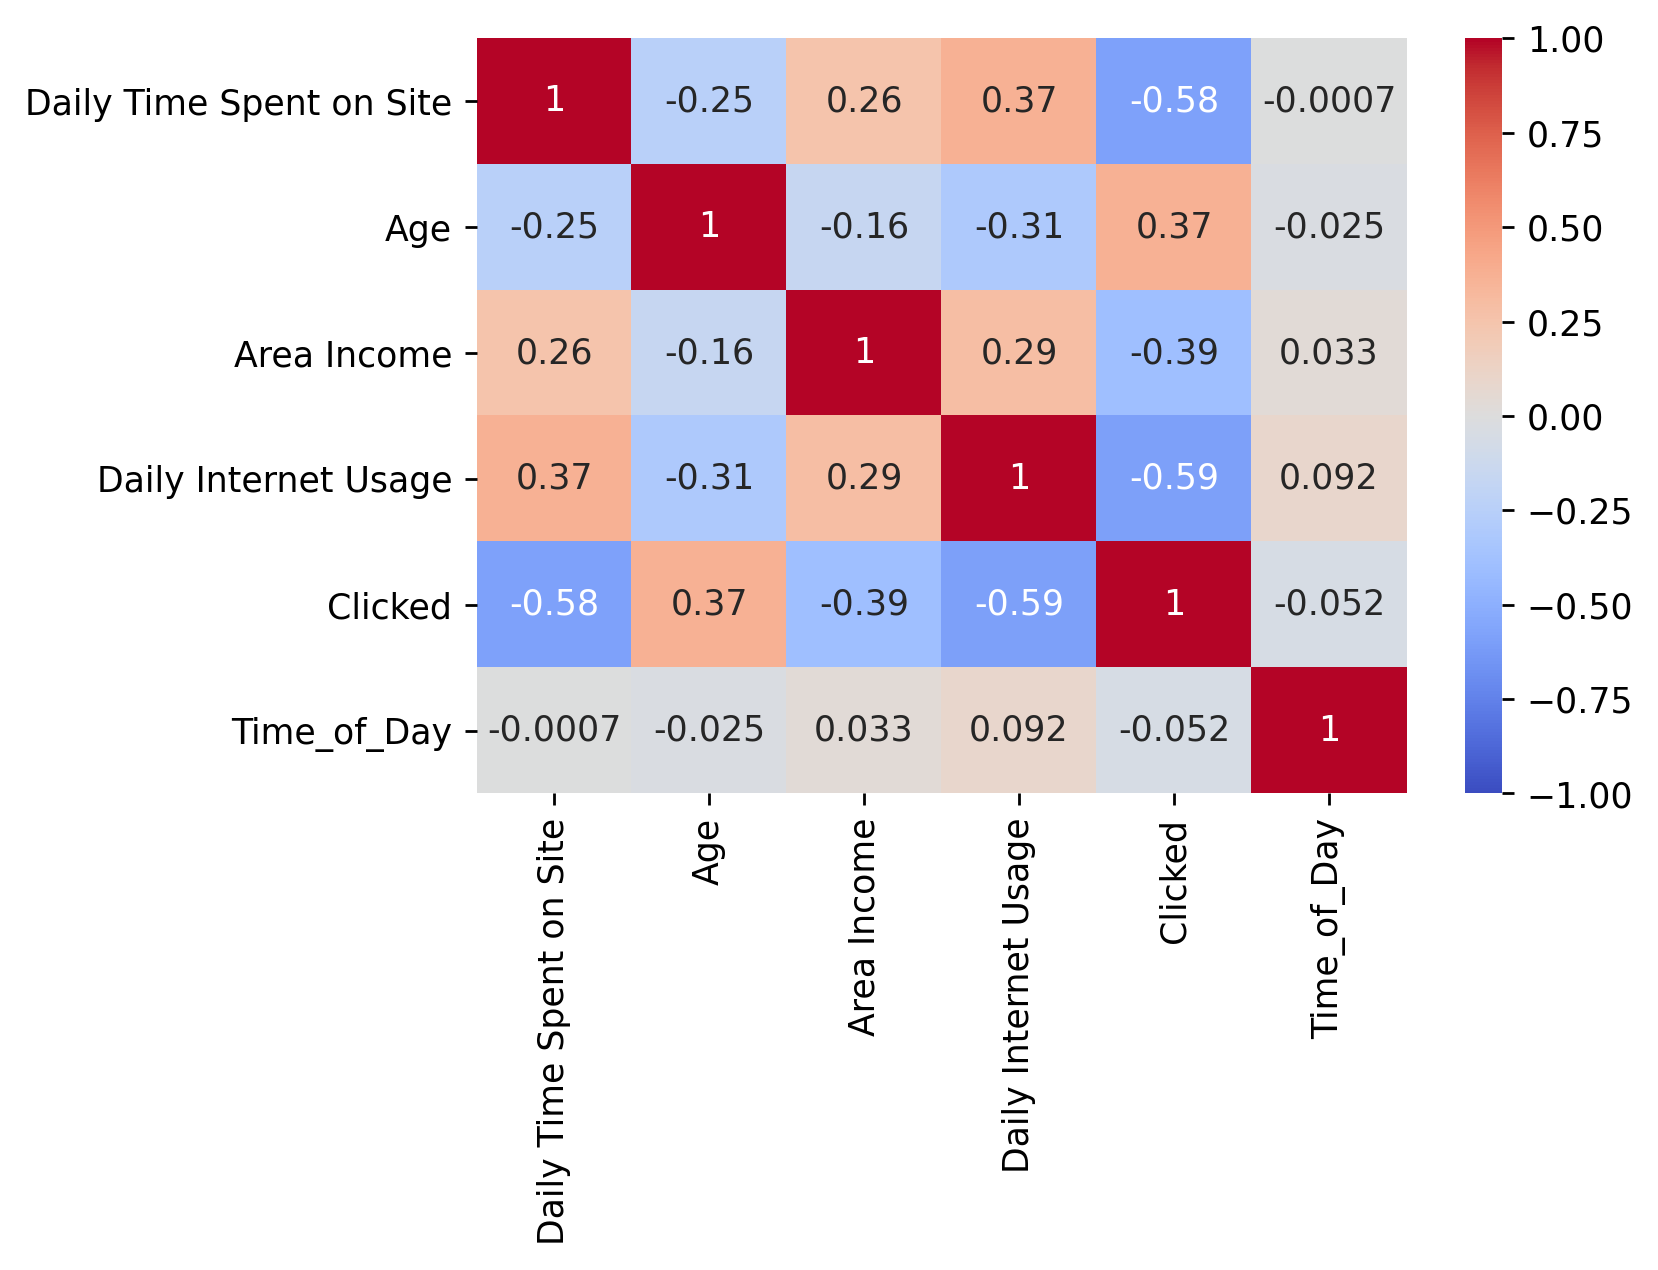

In [42]:
corr=train[temp_features].corr()
plt.figure(dpi=250)
sns.heatmap(data=corr,vmin=-1,cmap='coolwarm',annot=(True))

#Most of the correlation of predictors < 0.3. We may consider utlizing the power of linear prediction.

In [43]:
testID = test['id']

In [44]:
y_train = train['Clicked']
X_train = train.drop('Clicked',axis=1)
X_train.drop('id',axis=1,inplace=True)
X_train.drop('Timestamp',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)
test.drop('Timestamp',axis=1,inplace=True)

In [45]:
#fit with Linear Support Vector Classifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [46]:
lsvc = LinearSVC(verbose=0,dual=False)

In [47]:
X_train.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'gender', 'weekday', 'Time_of_Day'],
      dtype='object')

In [48]:
#train with all training data
lsvc.fit(X_train,y_train)

LinearSVC(dual=False)

In [49]:
train_predict=lsvc.predict(X_train)

In [50]:
score = lsvc.score(X_train, y_train)
print("Score: ", score)

Score:  0.807


In [51]:
cv_scores = cross_val_score(lsvc, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

CV average score: 0.80


In [52]:
cm = confusion_matrix(y_train, train_predict)
print(cm)

[[431  66]
 [127 376]]


In [53]:
print(lsvc.coef_)

[[-1.48477013e-02  4.95384801e-02 -2.98478423e-06 -4.77043870e-03
   4.43687992e-03  2.05429389e-02  1.00289910e-02]]


In [54]:
feature_importance=pd.DataFrame(lsvc.coef_.reshape(1,-1),columns=X_train.columns)

In [55]:
feature_importance.sort_values(by=0,axis=1,inplace=True)

Text(0.5, 1.0, 'Ad-Click Distribution on Weekday')

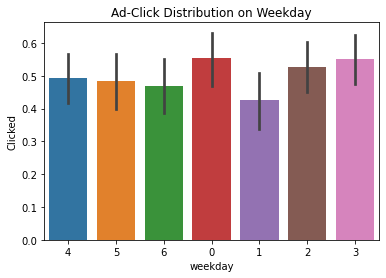

In [56]:
weekClick=train[['weekday','Clicked']]
sns.barplot(x='weekday',y='Clicked',data=weekClick).set_title('Ad-Click Distribution on Weekday')
# 0: Sunday... 6: Saturday
# Weekend include Friday are the top days for successful ad-click. The least ad click occurs on monday.
# The difference of ad-click between days of a week is not huge, but should be still be noticed.

Text(0.5, 1.0, 'Ad-Click Distribution on 24hrs')

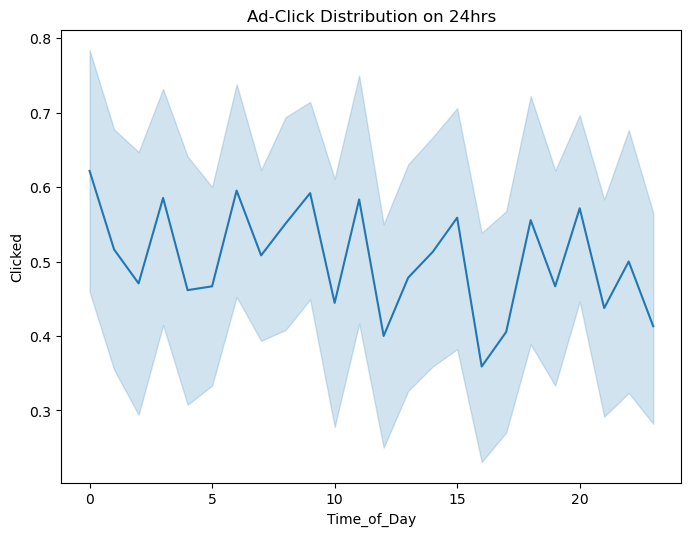

In [57]:
hourClick = train[['Clicked','Time_of_Day']]
plt.figure(dpi=100,figsize=(8,6))
sns.lineplot(x='Time_of_Day',y='Clicked',data=hourClick).set_title('Ad-Click Distribution on 24hrs')
#On average, the most Ad-click occurs on midnight 00:00, 
#the least is 16:00. There is a big increase of Ad-click from 23:00 to 24:00.

Text(0.5, 1.0, 'Ad-Clicks among Gender')

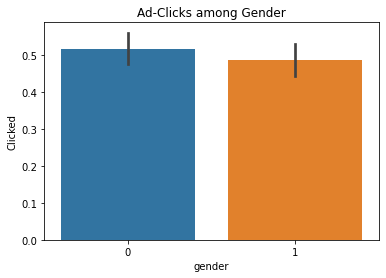

In [58]:
genderClick = train[['Clicked','gender']]
sns.barplot(x='gender',y='Clicked',data=genderClick).set_title('Ad-Clicks among Gender')
# Female clicks Ad. more than male.

Text(0.5, 1.0, 'Ad-Clicks Distribution on Age')

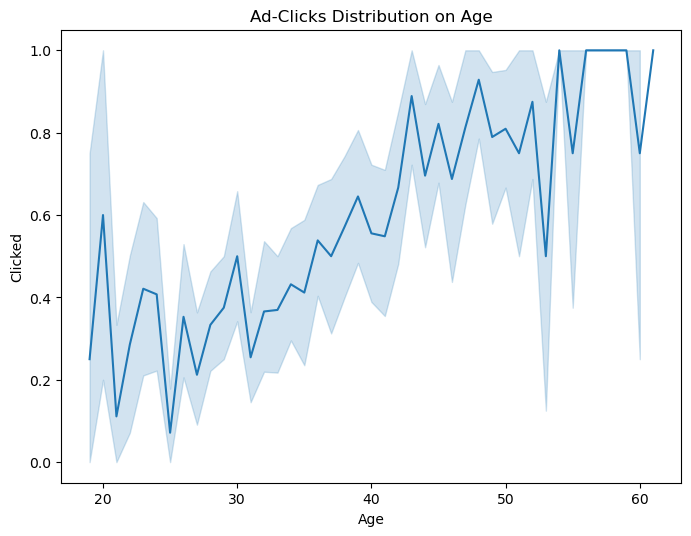

In [59]:
ageClick= train[['Clicked','Age']]
plt.figure(dpi=100,figsize=(8,6))
sns.lineplot(x='Age',y='Clicked',data=ageClick).set_title('Ad-Clicks Distribution on Age')
# As age increase, people are more likely to click ad. Especially on people older than 40s.
# Age group arond 25 clicks clicks the least ad.
# Exception exist. Age group around early 19 to late 20, is also likely to click ad.

<AxesSubplot:>

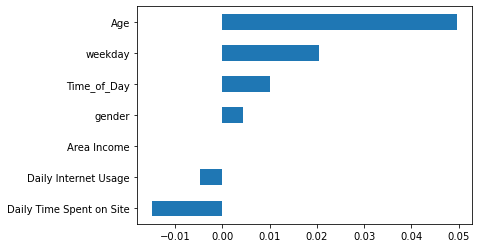

In [60]:
feature_importance.squeeze(axis=0).plot(kind='barh')
#Age is the most significant positive factor for Ad click, followed by weekday. 
#Daily Internet Usage and Daily Time Spent on Site may negatively related to Ad-click. 
#Possible explaination: Ad-attraction is negatively related to people's time-duration of exposure to advertisment.

#Ad has similar attraction to people live in area with different avg-income levels.

In [61]:
cr = classification_report(y_train, train_predict)
print(cr)

              precision    recall  f1-score   support

       False       0.77      0.87      0.82       497
        True       0.85      0.75      0.80       503

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000



In [62]:
test.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'gender', 'weekday', 'Time_of_Day'],
      dtype='object')

In [63]:
test_result=pd.DataFrame(lsvc.predict(test))

In [64]:
test_result.rename(columns = {0 : 'Clicked'}, inplace = True)
predict_result=pd.concat([testID,pd.DataFrame(test_result)],axis=1)

In [65]:
predict_result

,id,Clicked
0,2200,True
1,2201,False
2,2202,False
3,2203,False
4,2204,False
...,...,...
295,2495,False
296,2496,True
297,2497,True
298,2498,False
